In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing data (from milestone 1)

In [2]:
# Loading the Needed Data Sets 
weather = pd.read_csv('data/hr_temp_20170201-20200131_subset.csv')
energy = pd.read_csv('data/hrl_load_metered - 20170201-20200131.csv')

In [3]:
d = {'MW': energy['mw'], 'Temp': weather['HourlyDryBulbTemperature'], 'Date': weather['DATE']}

In [4]:
df = pd.DataFrame(d)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

MW             float64
Temp           float64
Date    datetime64[ns]
dtype: object


In [6]:
df['hour'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).hour
df['day'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).day
df['weekday'] = df['Date'].dt.dayofweek
df['month'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).month
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).year

df.head()

,MW,Temp,Date,hour,day,weekday,month,year
0,1419.881,37.0,2017-02-01 00:53:00,0,1,2,2,2017
1,1379.505,37.0,2017-02-01 01:53:00,1,1,2,2,2017
2,1366.106,36.0,2017-02-01 02:53:00,2,1,2,2,2017
3,1364.453,36.0,2017-02-01 03:53:00,3,1,2,2,2017
4,1391.265,36.0,2017-02-01 04:53:00,4,1,2,2,2017


In [7]:
df = df.set_index('Date')

In [8]:
df['Temp'] = df['Temp'].interpolate(method='linear')

In [9]:
#Training and Validation Split #
train = pd.DataFrame(df['2017-01-01':'2019-12-31'])
test = pd.DataFrame(df['2020-01-01':'2020-01-31'])

# Exploring / Visualizing Energy and Temperature Dat

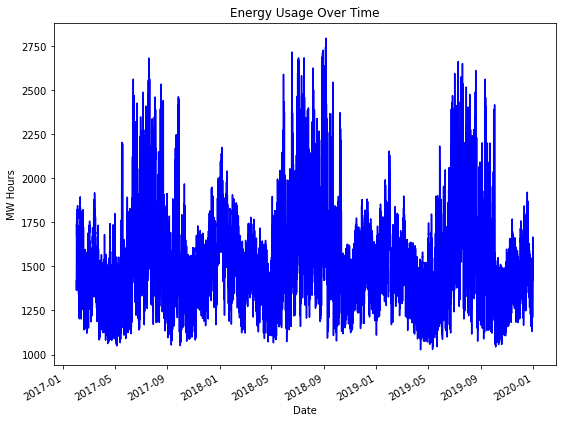

In [10]:
ax1 = train['MW'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')
ax1.set_title('Energy Usage Over Time')

plt.show()

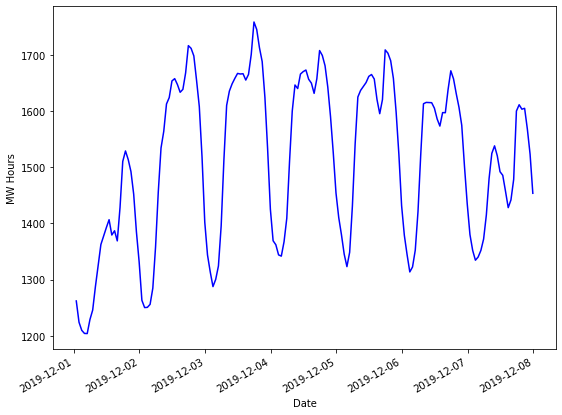

In [11]:
train_mw = train['MW']

ax1 = train_mw['2019-12-01':'2019-12-07'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

plt.show()

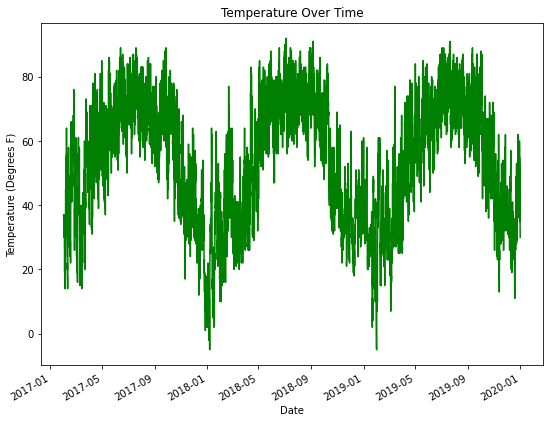

In [13]:
ax2 = train['Temp'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature (Degrees F)')
ax2.set_xlabel('Date')
ax2.set_title('Temperature Over Time')

plt.show()

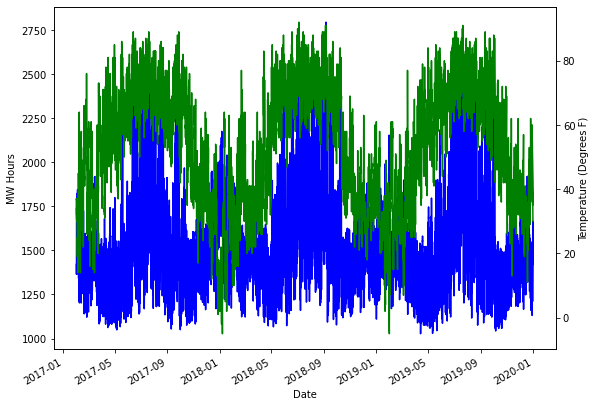

In [12]:
ax1 = train['MW'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train['Temp'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature (Degrees F)')

plt.show()

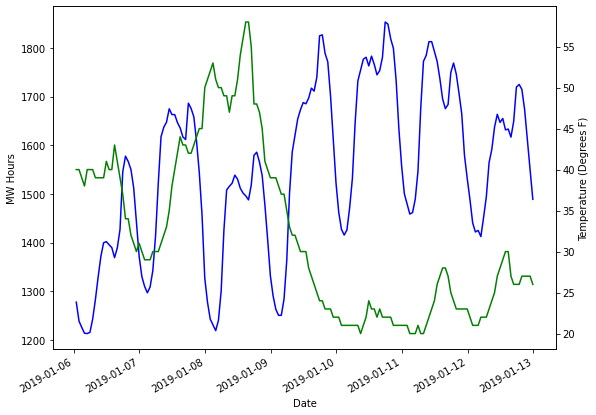

In [14]:
train_mw = train['MW']
train_t = train['Temp']

ax1 = train_mw['2019-01-06':'2019-01-12'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train_t['2019-01-06':'2019-01-12'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature (Degrees F)')

plt.show()

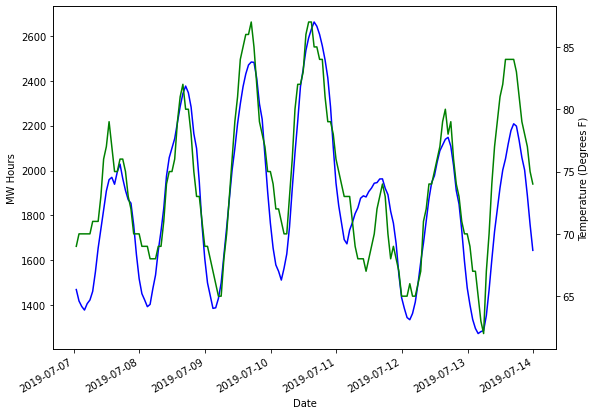

In [15]:
train_mw = train['MW']
train_t = train['Temp']

ax1 = train_mw['2019-07-07':'2019-07-13'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train_t['2019-07-07':'2019-07-13'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature (Degrees F)')

plt.show()

# Correlation

In [16]:
correlation = train['Temp'].corr(train['MW'])
print("Correlation is: ", correlation)

Correlation is:  0.32753955690741215


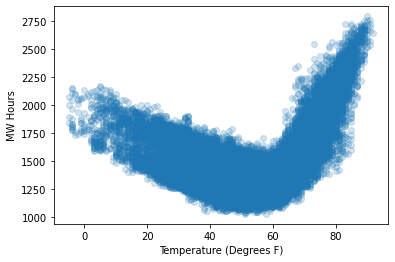

In [17]:
plt.scatter(train['Temp'], train['MW'], alpha = 0.2)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')
plt.show()